In [45]:
#export
import numpy as np
import qtensor as qt
import qtensor
from qtensor.tests.qiskit_qaoa_energy import simulate_qiskit_amps
from qtensor.tests.qaoa_quimb import simulate_one_parallel as simulate_quimb_energy
from qtensor.tests.acqdp_qaoa import single_qaoa_query as simulate_acqdp_energy
import matplotlib.pyplot as plt
import time

from cartesian_explorer import Explorer, caches

In [46]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
#export
cache = caches.JobLibCache('../../caex_cache/skylake_merged_speed_comparison')
ex = Explorer(cache=cache)

In [48]:
#export    
@ex.provider
def graph(N, d=3, graph_type='random', seed=10):
    return qt.toolbox.random_graph(nodes=N, type=graph_type, degree=d, seed=seed)

In [49]:
#export
@ex.provider
def quimb_time_energy(graph, p,
               n_processes=2,
               qmb_optimizer_time=0.3,
               qmb_ordering_algo='uniform'
              ):
    start = time.time()
    try:
        _ = simulate_quimb_energy(graph, p,
                                  n_processes=n_processes,
                                  optimizer_time=qmb_optimizer_time,
                                  ordering_algo=qmb_ordering_algo
                                 )
    except Exception as e:
        print('Exception:', e)
        return None
    end = time.time()
    return end - start

## Ansatz simulations

In [50]:
#export
@ex.provider
def qtensor_time_ansatz_merged(graph, p,
               n_processes=2,
               qtn_ordering_algo='greedy'
              ):
    gamma, beta = [.1]*p, [.3]*p
    
    comp = qtensor.DefaultQAOAComposer(graph, gamma=gamma, beta=beta)
    comp.ansatz_state()
    opt  = qtensor.toolbox.get_ordering_algo(qtn_ordering_algo)
 
    backend = qtensor.contraction_backends.NumpyBackend()
    sim = qtensor.MergedSimulator.MergedSimulator(backend=backend, optimizer=opt)
 
    start = time.time()
    try:
        amp = sim.simulate(comp.circuit)
    except Exception as e:
        print('error:', e)
        return None
    return time.time() - start

In [51]:
#export
@ex.provider
def qtensor_time_ansatz(graph, p,
               n_processes=2,
               qtn_ordering_algo='greedy'
              ):
    gamma, beta = [.1]*p, [.3]*p
    
    comp = qtensor.DefaultQAOAComposer(graph, gamma=gamma, beta=beta)
    comp.ansatz_state()
    opt  = qtensor.toolbox.get_ordering_algo(qtn_ordering_algo)
 
    backend = qtensor.contraction_backends.NumpyBackend()
    sim = qtensor.QtreeSimulator(backend=backend, optimizer=opt)
 
    start = time.time()
    try:
        amp = sim.simulate(comp.circuit)
    except Exception as e:
        print('error:', e)
        return None
    return time.time() - start

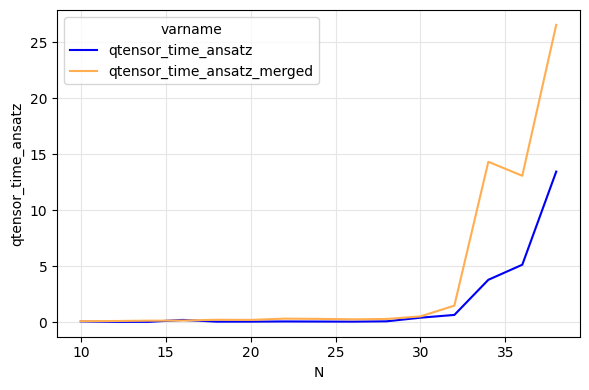

In [52]:
f = ex.plot_variables(('qtensor_time_ansatz', 'qtensor_time_ansatz_merged'),
                  N=range(10, 40, 2),
                  p=[3],
                  qtn_ordering_algo=['greedy']
                 )

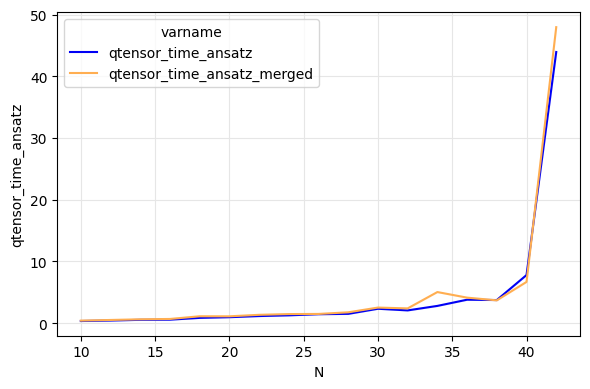

In [53]:
f = ex.plot_variables(('qtensor_time_ansatz', 'qtensor_time_ansatz_merged'),
                  N=range(10, 44, 2),
                  p=[3],
                  qtn_ordering_algo=['rgreedy_0.02_60']
                 )

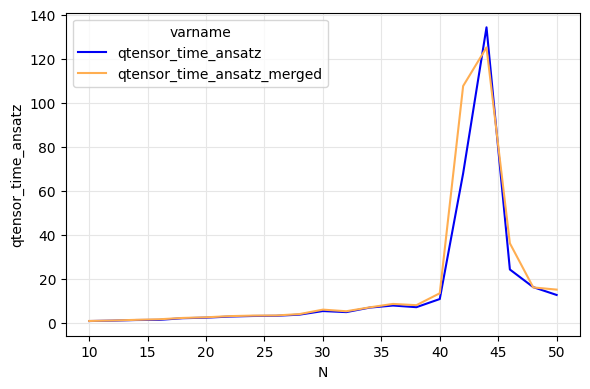

In [54]:
f = ex.plot_variables2d(('qtensor_time_ansatz', 'qtensor_time_ansatz_merged'),
                  N=range(10, 56, 2),
                  p=[3],
                  qtn_ordering_algo=['rgreedy_0.03_150']
                 )

will have tw 28
Permuted peo: [v_0, v_1, v_2, v_3, v_4, v_5, v_6, v_7, v_8, v_9, v_10, v_11, v_12, v_13, v_14, v_15, v_16, v_17, v_18, v_19, v_20, v_21, v_22, v_23, v_24, v_25, v_26, v_27, v_28, v_29, v_30, v_31, v_32, v_33, v_34, v_35, v_36, v_37, v_38, v_39, v_40, v_41, v_42, v_43, v_44, v_45, v_46, v_47, v_48, v_49, v_50, v_51, v_52, v_53, v_54, v_55, v_56, v_57, v_58, v_59, v_60, v_61, v_62, v_63, v_64, v_65, v_66, v_67, v_68, v_69, v_70, v_71, v_72, v_73, v_74, v_75, v_76, v_77, v_78, v_79, v_80, v_81, v_82, v_83, v_84, v_85, v_86, v_87, v_88, v_89, v_90, v_91, v_92, v_93, v_94, v_95, v_96, v_97, v_98, v_99, v_100, v_101, v_102, v_103, v_104, v_105, v_106, v_107, v_108, v_109, v_110, v_111, v_112, v_113, v_114, v_115, v_116, v_117, v_118, v_119, v_120, v_121, v_122, v_123, v_124, v_125, v_126, v_127, v_128, v_129, v_130, v_131, v_132, v_133, v_134, v_135, v_136, v_137, v_138, v_139, v_140, v_141, v_142, v_143, v_144, v_145, v_146, v_147, v_148, v_149, v_150, v_151, v_152, v_153, v

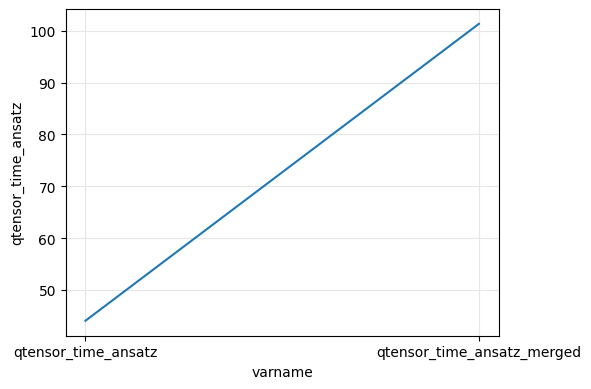

In [34]:
f = ex.plot_variables2d(('qtensor_time_ansatz', 'qtensor_time_ansatz_merged'),
                  N=range(30, 32, 2),
                  p=[4],
                  qtn_ordering_algo=['rgreedy_0.03_160']
                 )

will have tw 23
will have tw 23
will have tw 21
will have tw 23
will have tw 29
Permuted peo: [v_0, v_1, v_2, v_3, v_4, v_5, v_6, v_7, v_8, v_9, v_10, v_11, v_12, v_13, v_14, v_15, v_16, v_17, v_18, v_19, v_20, v_21, v_22, v_23, v_24, v_25, v_26, v_27, v_28, v_29, v_30, v_31, v_32, v_33, v_34, v_35, v_36, v_37, v_38, v_39, v_40, v_41, v_42, v_43, v_44, v_45, v_46, v_47, v_48, v_49, v_50, v_51, v_52, v_53, v_54, v_55, v_56, v_57, v_58, v_59, v_60, v_61, v_62, v_63, v_64, v_65, v_66, v_67, v_68, v_69, v_70, v_71, v_72, v_73, v_74, v_75, v_76, v_77, v_78, v_79, v_80, v_81, v_82, v_83, v_84, v_85, v_86, v_87, v_88, v_89, v_90, v_91, v_92, v_93, v_94, v_95, v_96, v_97, v_98, v_99, v_100, v_101, v_102, v_103, v_104, v_105, v_106, v_107, v_108, v_109, v_110, v_111, v_112, v_113, v_114, v_115, v_116, v_117, v_118, v_119, v_120, v_121, v_122, v_123, v_124, v_125, v_126, v_127, v_128, v_129, v_130, v_131, v_132, v_133, v_134, v_135, v_136, v_137, v_138, v_139, v_140, v_141, v_142, v_143, v_144, 

de,dc,da,dh,gbdf->abcefgh
fb,fa,fe,fh,fcdg->abcdegh
ae,ad,a,gcba,hfca->bcdefgh
gd,gb,g,acefgh->abcdefh
fa,fc,fe,fb,adfgh->abcdegh
ed,ec,ei,ea,befgh->abcdfghi
dg,dh,d,cdei,adbf->abcefghi
fb,fc,fi,fdah,acefg->abcdeghi
ab,ae,ah,ai,acdfg->bcdefghi
dg,d,fdgi,acdegj,bdehgij->abcefghij
g,acdefghbi->abcdefhi
fd,fe,fj,aibcfghj->abcdeghij
je,ja,jc,dhijk,bdefghj->abcdefghik
ae,ai,ab,acfjk,abcdgh->bcdefghijk
kf,kg,acdehijbk->abcdefghij
aj,a,baghil,acdefgjk->bcdefghijkl
e,kjbe,acdefghijl->abcdfghijkl
bd,b,bcejlm,abcfegjikh->acdefghijklm
lk,lm,lb,gijlc,abdehfl->abcdefghijkm
fe,f,bikf,abfgh,cdfhjklm->abcdeghijklm
dj,da,dn,bcedfghkilmn->abcefghijklmn
me,mc,ncjkm,cefhikm,bncdefglam->abcdefghijkln
be,labcdefghijkm->acdefghijklm
kc,k,abcefjk,cdeghiklmno->abcdefghijlmno
ef,pbeghmoc,adefihjklmnq->dfikocabghjlmnpq
ne,n,bcefgjlmnpq,abdeinjokmhq->aegijklhobcfqmpd
bl,b,aefhijkmnbcgplod->aefhijkmncgplod
hlmijbfk,abjckdemnofgpqrs->haijckdelmnofgpqrs
du,pabkqcdegrmotu,iabcdelmnpfushj->itabkcelmnopfqugrshj
ld,lc,h

rb,sgqbhdokltrmef,nabcdopqerfsguijhkltm->nabcdopqefsguhijkltm
m,nabcdopqefrgthijklsm->nabcdopqefrgthijkls
kh,mabcdnopefqgshijklr->mabcdnopefqghijlrs
nh,bdgijkfoprqahlmenc->bdgijkfopqrahlmec
lo,bcefghlnpqiajkmdo->bcefghnpiqajkmdo
bdfghimnpoajklec->bdfgimnopajklec
bdfghmnoiajklec->abcdeghijklmno
bcldjefnghikma->abcdefghijlmn
mabcdefghiklj->abcdefhijklm
bcdefghiljka->abcdefghikl
a,kabcdefgijh->bcdefghijk
abcedfjghi->bcdefghij
a,acdebghif->bcdefghi
adcbhefg->abcdegh
a,abcdfge->cbdfge
abcefd->abdef
c,abcde->abed
abdc->bdc
a,acb->cb
b,ab->a
a->
only contract : 0.6946101188659668
Permuted peo: [v_0, v_1, v_2, v_3, v_4, v_5, v_6, v_7, v_8, v_9, v_10, v_11, v_12, v_13, v_14, v_15, v_16, v_17, v_18, v_19, v_20, v_21, v_22, v_23, v_24, v_25, v_26, v_27, v_28, v_29, v_30, v_31, v_32, v_33, v_34, v_35, v_36, v_37, v_38, v_39, v_40, v_41, v_42, v_43, v_44, v_45, v_46, v_47, v_48, v_49, v_50, v_51, v_52, v_53, v_54, v_55, v_56, v_57, v_58, v_59, v_60, v_61, v_62, v_63, v_64, v_65, v_66, v_67, v_68, v

ed,ec,eb,ea,e->cdab
ea,eb,ec,ed,e->dbac
eb,ea,ef,ec,ed->acdbf
fe,fc,fd,fb,fa->abcde
ae,af,ad,ab,ac->bcdef
fe,fa,fb,fd,fc->abcde
bd,be,bf,ba,bc->acdef
cb,ce,ca,cd,cf->ebdaf
ce,cd,cf,ca,cb->abdef
fa,fb,fc,f,debf->abcde
bc,bd,ba,bf,be->acdef
cd,cf,cb,ce,ca->abdef
fb,fd,fa,fe,fc->abcde
ac,af,ab,ad,ae->bcdef
eb,ef,ed,ec,ea->abcdf
cd,cf,ca,ce,cb->abdef
ea,ed,ef,eb,ec->abcdf
af,ad,ab,ae,ac->bcdef
ef,ec,ea,ed,eb->abcdf
fb,fe,fd,f,cafg->abcdeg
gc,ge,gb,g,gadf->abcefd
cg,cf,ce,c,bdac->abdefg
ed,ef,ea,e,ebcg->abcdfg
fe,fc,fb,f,afdg->abcdeg
bc,bh,ba,be,gdbf->acdefgh
cd,ce,ch,ca,bcefg->abdefgh
cf,cg,c,cdab,cefh->abdefgh
gc,gh,ga,gd,befgi->abcdefhi
di,db,d,chfd,eagd->abcefghi
ib,ih,i,fcia,bcdegi->abcdefgh
ah,ag,ae,abfgi,abcdg->bcdefghi
hd,he,h,chab,ghif->abcdefgi
ae,ah,ai,ad,abcfg->bcdefghi
ig,ih,i,cefi,adib->abcdefgh
ha,hc,he,hb,dfghi->abcdefgi
db,dc,dh,ideg,adfij->abcefghij
fa,fb,fe,dfhi,cdgfj->abcdeghij
kc,kg,kj,abdfk,bcehik->abcdefghij
hf,ha,h,jhik,bcefghd->abcdefgijk
gl,cfghj,abdegl,bdfgijk->ab

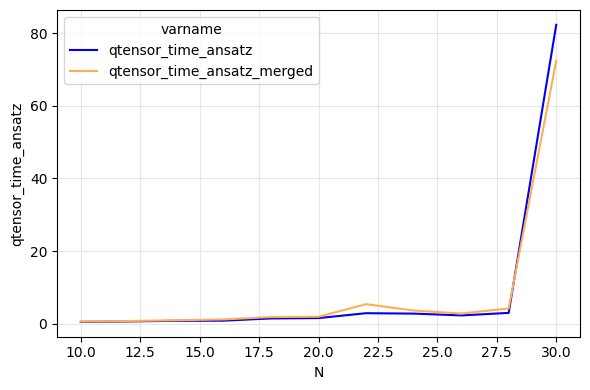

In [36]:
# with disabled merging in utils.py file
f = ex.plot_variables2d(('qtensor_time_ansatz', 'qtensor_time_ansatz_merged'),
                  N=range(10, 32, 2),
                  p=[4],
                  qtn_ordering_algo=['rgreedy_0.03_60']
                 )

## Energy simulations

In [55]:
#export
@ex.provider
def qtensor_time_energy(graph, p,
               n_processes=2,
               qtn_ordering_algo='greedy'
              ):
    gamma, beta = [.1]*p, [.3]*p
    opt = qt.toolbox.get_ordering_algo(qtn_ordering_algo)
    sim = qt.QAOAQtreeSimulator(qt.DefaultQAOAComposer, optimizer=opt)
    start = time.time()
    try:
        _ = sim.energy_expectation_parallel(graph, gamma, beta, n_processes=n_processes)
    except Exception as e:
        print('Exception:', e)
        return None
    end = time.time()
    return end - start

In [56]:
#export

class QAOAMergedSimulator(qt.MergedSimulator.MergedSimulator, qt.QAOAQtreeSimulator):
    pass

In [57]:
#export
@ex.provider
def qtensor_time_energy_merged(graph, p,
               n_processes=2,
               qtn_ordering_algo='greedy'
              ):
    gamma, beta = [.1]*p, [.3]*p
    opt = qt.toolbox.get_ordering_algo(qtn_ordering_algo)
    sim = QAOAMergedSimulator(qt.DefaultQAOAComposer, optimizer=opt)
    start = time.time()
    try:
        _ = sim.energy_expectation_parallel(graph, gamma, beta, n_processes=n_processes)
    except Exception as e:
        print('Exception:', e)
        return None
    end = time.time()
    return end - start

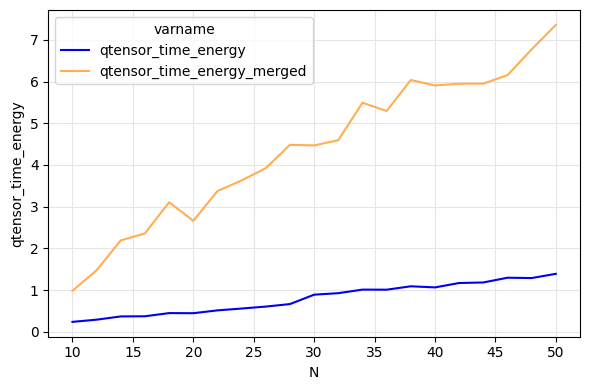

In [18]:
f = ex.plot_variables2d(('qtensor_time_energy', 'qtensor_time_energy_merged'),
                        N=range(10, 52, 2),
                        p=[3],
                        qtn_ordering_algo=['greedy'],
                        seed=[12]
                        
                 )

## CLI

In [25]:
#export
import fire

In [37]:
#export

def cli(v=('qtensor_time_energy_merged', ),
        n=[10, 12, 14], p=[3], ordering_algo=['greedy'], seed=[10]):

    xar = ex.get_variables_xarray(
        v,
        N=n,
        p=p,
        qtn_ordering_algo=ordering_algo,
        seed=seed
        

    )
    print(xar)
    

if __name__=='__main__':
    fire.Fire(cli)

ValueError: Failed to resolve: no providers for {'qtensor_time_energy_merged'}

In [ ]:
from qtensor_specs import cli, click

In [40]:
%load_ext snakeviz

In [58]:
%snakeviz cli()


_dimcount 2
 
*** Profile stats marshalled to file '/tmp/tmpwf4hjs4s'. 
Embedding SnakeViz in this document...


## Nbdev

In [39]:
#hide
#default_exp compare_merged_ix

from nbdev.export  import *
notebook2script()

Converted Compare merged ix.ipynb.
Converted QAOA_bench.ipynb.
Converted Speed_comparison.ipynb.
Converted Time_vs_FLOP.ipynb.
Converted Transfer optimal QAOA params.ipynb.
Converted Tree subgraph.ipynb.
Converted Tree tw quimb.ipynb.
Converted index.ipynb.
Converted qaoa_ansatz_complexity.ipynb.
